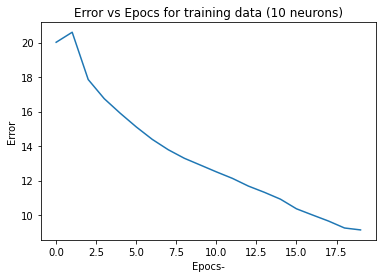

Overall Training Error in case of 10 neurons is 267.6007600932797
The classification accuracy obtained in test data is 70 percent


In [1]:
import seaborn as sns
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import math
import os
import imageio
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.set_printoptions(threshold=np.inf)
image_path = r"./emotion_classification/train/"
train_data = os.listdir(image_path)
X=np.zeros([10201,len(train_data)],dtype='float64') #matrix to store feature vectors
X=np.matrix(X)
for i in range(len(train_data)):
    image=imageio.imread(image_path+train_data[i])
    image=np.reshape(image,(10201,1))
    X[:,i]=image
scaler=StandardScaler()
scaler.fit(X.T)
scaled_data=scaler.transform(X.T) 
pca=PCA(n_components=12)
pca.fit(scaled_data)
X_train=pca.transform(scaled_data)
correct=np.zeros((20,2))
dum=0
for name in range(len(train_data)):
    if ((train_data[name].split('.'))[1])=='happy':
        correct[dum][0]=1
        correct[dum][1]=0
    else:
        correct[dum][0]=0
        correct[dum][1]=1
    dum=dum+1
image_path = r"./emotion_classification/test/"
test_data = os.listdir(image_path)
X_test=np.zeros([10201,len(test_data)],dtype='float64') #matrix to store feature vectors
X_test=np.matrix(X_test)
for i in range(len(test_data)):
    image=imageio.imread(image_path+test_data[i])
    image=np.reshape(image,(10201,1))
    X_test[:,i]=image
scaled_data_test=scaler.transform(X_test.T)
X_Test=pca.transform(scaled_data_test)

correct_test=np.zeros((10,2))
dum=0
for name in range(len(test_data)):
    if ((test_data[name].split('.'))[1])=='happy':
        correct_test[dum][0]=1
        correct_test[dum][1]=0
    else:
        correct_test[dum][0]=0
        correct_test[dum][1]=1
    dum=dum+1





eta=0.005      #Learning Rate
temp_error=[]

#Initializing Weights
b_1=np.zeros(10)
for i in range(10):
    b_1[i]=np.random.uniform(10)/100
b_2=np.zeros(10)
for i in range(10):
    b_2[i]=np.random.uniform(10)/100
b_3=np.zeros(2)
for i in range(2):
    b_3[i]=np.random.uniform(10)/100

W_1=np.zeros((10,12))
for i in range(10):
    for j in range(12):
        W_1[i][j]=np.random.uniform(10)/100
W_2=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        W_2[i][j]=np.random.uniform(10)/100
W_3=np.zeros((2,10))
for i in range(2):
    for j in range(10):
        W_3[i][j]=np.random.uniform(10)/100
        
#Activation Function
def relu(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j]>0:
                continue
            else:
                arr[i][j]=0
    return arr

#Calculating Gradient
def grad(a_dem):
    for i in range(a_dem.shape[0]):
        for j in range(a_dem.shape[1]):
            if a_dem[i][j]>0:
                a_dem[i][j]=1
            else:
                a_dem[i][j]=0
    return a_dem
for epoc in range(20):
    eroort=0
    #Feed_Forward
    h0=X_train
    a1=(W_1@X_train.T)+b_1.reshape((10,1))
    h1=relu(a1)
    a2=(W_2@h1)+b_2.reshape((10,1))
    h2=relu(a2)
    a3=((W_3@h2)+b_3.reshape((2,1))).T
    exph3=np.exp(a3)
    Y=exph3/exph3.sum(axis=1,keepdims=True)

    #Backpropogation
    del_a3=(Y-correct).T
    del_W3=del_a3@h2.T
    del_b3=del_a3.sum(axis=1)
    del_h2=(W_3.T)@del_a3
    del_a2=np.multiply(del_h2,grad(a2))        
    del_W2=del_a2@h1.T
    del_b2=del_a2.sum(axis=1)
    del_h1=(W_2.T)@del_a2
    del_a1=np.multiply(del_h1,grad(a1))
    del_W1=del_a1@h0
    del_b1=del_a1.sum(axis=1)


    W_1=W_1- (eta*del_W1)
    W_2=W_2-(eta*del_W2)
    W_3=W_3-(eta*del_W3)
    b_1=b_1-(eta*del_b1)
    b_2=b_2-(eta*del_b2)
    b_3=b_3-(eta*del_b3)
    
    for i in range(Y.shape[0]):
        eroort+=(correct[i][0]*np.log2(Y[i][0])+correct[i][1]*np.log2(Y[i][1]))*(-1)
    temp_error.append(eroort)
plt.plot(temp_error)
plt.title("Error vs Epocs for training data (10 neurons)")
plt.xlabel("Epocs-")
plt.ylabel("Error")
plt.show()
print("Overall Training Error in case of 10 neurons is",sum(temp_error))
#Test Data
h0=X_Test
a1=(W_1@X_Test.T)+b_1.reshape((10,1))
h1=relu(a1)
a2=(W_2@h1)+b_2.reshape((10,1))
h2=relu(a2)
a3=((W_3@h2)+b_3.reshape((2,1))).T
exph3=np.exp(a3)
Y_test=exph3/exph3.sum(axis=1,keepdims=True)

# temp_error_test=np.linalg.norm((Y_test-correct_test),2)
# plt.plot(temp_error_test)
# plt.title("Error in case of test data")
# plt.show()
# print(temp_error_test)

for i in range(Y_test.shape[0]):
    if Y_test[i][0]>Y_test[i][1]:
        Y_test[i][0]=1
        Y_test[i][1]=0
    else:
        Y_test[i][0]=0
        Y_test[i][1]=1


count=0
for i in range(Y_test.shape[0]):
    if Y_test[i][0]==correct_test[i][0]:
        count=count+1
print("The classification accuracy obtained in test data is {} percent".format(count*10))

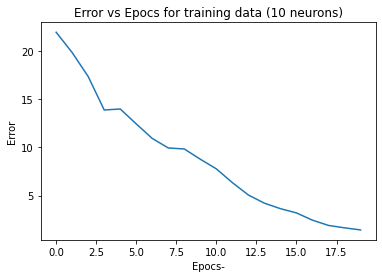

Overall Training Error in case of 10 neurons is 176.71852013313264
The classification accuracy obtained in test data is 100 percent


In [34]:
import seaborn as sns
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import math
import os
import imageio
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.set_printoptions(threshold=np.inf)
image_path = r"./emotion_classification/train/"
train_data = os.listdir(image_path)
X=np.zeros([10201,len(train_data)],dtype='float64') #matrix to store feature vectors
X=np.matrix(X)
for i in range(len(train_data)):
    image=imageio.imread(image_path+train_data[i])
    image=np.reshape(image,(10201,1))
    X[:,i]=image
scaler=StandardScaler()
scaler.fit(X.T)
scaled_data=scaler.transform(X.T) 
pca=PCA(n_components=12)
pca.fit(scaled_data)
X_train=pca.transform(scaled_data)
correct=np.zeros((20,2))
dum=0
for name in range(len(train_data)):
    if ((train_data[name].split('.'))[1])=='happy':
        correct[dum][0]=1
        correct[dum][1]=0
    else:
        correct[dum][0]=0
        correct[dum][1]=1
    dum=dum+1
image_path = r"./emotion_classification/test/"
test_data = os.listdir(image_path)
X_test=np.zeros([10201,len(test_data)],dtype='float64') #matrix to store feature vectors
X_test=np.matrix(X_test)
for i in range(len(test_data)):
    image=imageio.imread(image_path+test_data[i])
    image=np.reshape(image,(10201,1))
    X_test[:,i]=image
scaled_data_test=scaler.transform(X_test.T)
X_Test=pca.transform(scaled_data_test)

correct_test=np.zeros((10,2))
dum=0
for name in range(len(test_data)):
    if ((test_data[name].split('.'))[1])=='happy':
        correct_test[dum][0]=1
        correct_test[dum][1]=0
    else:
        correct_test[dum][0]=0
        correct_test[dum][1]=1
    dum=dum+1



previous_W1=previous_W2=previous_W3=previous_b1=previous_b2=previous_b3=0
gamma=0.9
eta=0.005         #Learning Rate
temp_error=[]

#Initializing Weights
b_1=np.zeros(10)
for i in range(10):
    b_1[i]=np.random.uniform(10)/100
b_2=np.zeros(10)
for i in range(10):
    b_2[i]=np.random.uniform(10)/100
b_3=np.zeros(2)
for i in range(2):
    b_3[i]=np.random.uniform(10)/100

W_1=np.zeros((10,12))
for i in range(10):
    for j in range(12):
        W_1[i][j]=np.random.uniform(10)/100
W_2=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        W_2[i][j]=np.random.uniform(10)/100
W_3=np.zeros((2,10))
for i in range(2):
    for j in range(10):
        W_3[i][j]=np.random.uniform(10)/100
        
#Activation Function
def relu(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j]>0:
                continue
            else:
                arr[i][j]=0
    return arr

#Calculating Gradient
def grad(a_dem):
    for i in range(a_dem.shape[0]):
        for j in range(a_dem.shape[1]):
            if a_dem[i][j]>0:
                a_dem[i][j]=1
            else:
                a_dem[i][j]=0
    return a_dem
for epoc in range(20):
    eroort=0
    #Feed_Forward
    h0=X_train
    a1=(W_1@X_train.T)+b_1.reshape((10,1))
    h1=relu(a1)
    a2=(W_2@h1)+b_2.reshape((10,1))
    h2=relu(a2)
    a3=((W_3@h2)+b_3.reshape((2,1))).T
    exph3=np.exp(a3)
    Y=exph3/exph3.sum(axis=1,keepdims=True)

    #Backpropogation
    del_a3=(Y-correct).T
    del_W3=del_a3@h2.T
    del_b3=del_a3.sum(axis=1)
    del_h2=(W_3.T)@del_a3
    del_a2=np.multiply(del_h2,grad(a2))        
    del_W2=del_a2@h1.T
    del_b2=del_a2.sum(axis=1)
    del_h1=(W_2.T)@del_a2
    del_a1=np.multiply(del_h1,grad(a1))
    del_W1=del_a1@h0
    del_b1=del_a1.sum(axis=1)


    W_1=W_1- (gamma*previous_W1+ eta*del_W1)
    W_2=W_2-(gamma*previous_W2+ eta*del_W2)
    W_3=W_3-(gamma*previous_W3+ eta*del_W3)
    b_1=b_1-(gamma*previous_b1+ eta*del_b1)
    b_2=b_2-(gamma*previous_b2+ eta*del_b2)
    b_3=b_3-(gamma*previous_b3+ eta*del_b3)
    previous_W1=(gamma*previous_W1+ eta*del_W1)
    previous_W2=(gamma*previous_W2+ eta*del_W2)
    previous_W3=(gamma*previous_W3+ eta*del_W3)
    previous_b1=(gamma*previous_b1+ eta*del_b1)
    previous_b2=(gamma*previous_b2+ eta*del_b2)
    previous_b3=(gamma*previous_b3+ eta*del_b3)
    for i in range(Y.shape[0]):
        eroort+=(correct[i][0]*np.log2(Y[i][0])+correct[i][1]*np.log2(Y[i][1]))*(-1)
    temp_error.append(eroort)
plt.plot(temp_error)
plt.title("Error vs Epocs for training data (10 neurons)")
plt.xlabel("Epocs-")
plt.ylabel("Error")
plt.show()
print("Overall Training Error in case of 10 neurons is",sum(temp_error))
#Test Data
h0=X_Test
a1=(W_1@X_Test.T)+b_1.reshape((10,1))
h1=relu(a1)
a2=(W_2@h1)+b_2.reshape((10,1))
h2=relu(a2)
a3=((W_3@h2)+b_3.reshape((2,1))).T
exph3=np.exp(a3)
Y_test=exph3/exph3.sum(axis=1,keepdims=True)

# temp_error_test=np.linalg.norm((Y_test-correct_test),2)
# plt.plot(temp_error_test)
# plt.title("Error in case of test data")
# plt.show()
# print(temp_error_test)

for i in range(Y_test.shape[0]):
    if Y_test[i][0]>Y_test[i][1]:
        Y_test[i][0]=1
        Y_test[i][1]=0
    else:
        Y_test[i][0]=0
        Y_test[i][1]=1


count=0
for i in range(Y_test.shape[0]):
    if Y_test[i][0]==correct_test[i][0]:
        count=count+1
print("The classification accuracy obtained in test data is {} percent".format(count*10))

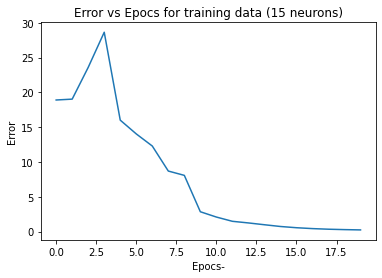

Overall Training Error in case of 15 neurons is 160.33729608222203
The classification accuracy obtained in test data is 100 percent


In [76]:
#For 15 number of Neurons
import seaborn as sns
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import math
import os
import imageio
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
np.set_printoptions(threshold=np.inf)
image_path = r"./emotion_classification/train/"
train_data = os.listdir(image_path)
X=np.zeros([10201,len(train_data)],dtype='float64') #matrix to store feature vectors
X=np.matrix(X)
for i in range(len(train_data)):
    image=imageio.imread(image_path+train_data[i])
    image=np.reshape(image,(10201,1))
    X[:,i]=image
scaler=StandardScaler()
scaler.fit(X.T)
scaled_data=scaler.transform(X.T) 
pca=PCA(n_components=12)
pca.fit(scaled_data)
X_train=pca.transform(scaled_data)
correct=np.zeros((20,2))
dum=0
for name in range(len(train_data)):
    if ((train_data[name].split('.'))[1])=='happy':
        correct[dum][0]=1
        correct[dum][1]=0
    else:
        correct[dum][0]=0
        correct[dum][1]=1
    dum=dum+1
image_path = r"./emotion_classification/test/"
test_data = os.listdir(image_path)
X_test=np.zeros([10201,len(test_data)],dtype='float64') #matrix to store feature vectors
X_test=np.matrix(X_test)
for i in range(len(test_data)):
    image=imageio.imread(image_path+test_data[i])
    image=np.reshape(image,(10201,1))
    X_test[:,i]=image
scaled_data_test=scaler.transform(X_test.T)
X_Test=pca.transform(scaled_data_test)

correct_test=np.zeros((10,2))
dum=0
for name in range(len(test_data)):
    if ((test_data[name].split('.'))[1])=='happy':
        correct_test[dum][0]=1
        correct_test[dum][1]=0
    else:
        correct_test[dum][0]=0
        correct_test[dum][1]=1
    dum=dum+1



previous_W1=previous_W2=previous_W3=previous_b1=previous_b2=previous_b3=0
gamma=0.9
eta=0.01        #Learning Rate
temp_error=[]

#Initializing Weights
b_1=np.zeros(15)
for i in range(15):
    b_1[i]=np.random.uniform(10)/100
b_2=np.zeros(15)
for i in range(15):
    b_2[i]=np.random.uniform(10)/100
b_3=np.zeros(2)
for i in range(2):
    b_3[i]=np.random.uniform(10)/100

W_1=np.zeros((15,12))
for i in range(15):
    for j in range(12):
        W_1[i][j]=np.random.uniform(10)/100
W_2=np.zeros((15,15))
for i in range(15):
    for j in range(15):
        W_2[i][j]=np.random.uniform(10)/100
W_3=np.zeros((2,15))
for i in range(2):
    for j in range(15):
        W_3[i][j]=np.random.uniform(10)/100
        
#Activation Function
def relu(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i][j]>0:
                continue
            else:
                arr[i][j]=0
    return arr

#Calculating Gradient
def grad(a_dem):
    for i in range(a_dem.shape[0]):
        for j in range(a_dem.shape[1]):
            if a_dem[i][j]>0:
                a_dem[i][j]=1
            else:
                a_dem[i][j]=0
    return a_dem
for epoc in range(20):
    eroort=0
    #Feed_Forward
    h0=X_train
    a1=(W_1@X_train.T)+b_1.reshape((15,1))
    h1=relu(a1)
    a2=(W_2@h1)+b_2.reshape((15,1))
    h2=relu(a2)
    a3=((W_3@h2)+b_3.reshape((2,1))).T
    exph3=np.exp(a3)
    Y=exph3/exph3.sum(axis=1,keepdims=True)

    #Backpropogation
    del_a3=(Y-correct).T
    del_W3=del_a3@h2.T
    del_b3=del_a3.sum(axis=1)
    del_h2=(W_3.T)@del_a3
    del_a2=np.multiply(del_h2,grad(a2))        
    del_W2=del_a2@h1.T
    del_b2=del_a2.sum(axis=1)
    del_h1=(W_2.T)@del_a2
    del_a1=np.multiply(del_h1,grad(a1))
    del_W1=del_a1@h0
    del_b1=del_a1.sum(axis=1)


    W_1=W_1- (gamma*previous_W1+ eta*del_W1)
    W_2=W_2-(gamma*previous_W2+ eta*del_W2)
    W_3=W_3-(gamma*previous_W3+ eta*del_W3)
    b_1=b_1-(gamma*previous_b1+ eta*del_b1)
    b_2=b_2-(gamma*previous_b2+ eta*del_b2)
    b_3=b_3-(gamma*previous_b3+ eta*del_b3)
    previous_W1=(gamma*previous_W1+ eta*del_W1)
    previous_W2=(gamma*previous_W2+ eta*del_W2)
    previous_W3=(gamma*previous_W3+ eta*del_W3)
    previous_b1=(gamma*previous_b1+ eta*del_b1)
    previous_b2=(gamma*previous_b2+ eta*del_b2)
    previous_b3=(gamma*previous_b3+ eta*del_b3)
    for i in range(Y.shape[0]):
        eroort+=(correct[i][0]*np.log2(Y[i][0])+correct[i][1]*np.log2(Y[i][1]))*(-1)
    temp_error.append(eroort)
plt.plot(temp_error)
plt.title("Error vs Epocs for training data (15 neurons)")
plt.xlabel("Epocs-")
plt.ylabel("Error")
plt.show()
print("Overall Training Error in case of 15 neurons is",sum(temp_error))
#Test Data
h0=X_Test
a1=(W_1@X_Test.T)+b_1.reshape((15,1))
h1=relu(a1)
a2=(W_2@h1)+b_2.reshape((15,1))
h2=relu(a2)
a3=((W_3@h2)+b_3.reshape((2,1))).T
exph3=np.exp(a3)
Y_test=exph3/exph3.sum(axis=1,keepdims=True)

# temp_error_test=np.linalg.norm((Y_test-correct_test),2)
# plt.plot(temp_error_test)
# plt.title("Error in case of test data")
# plt.show()
# print(temp_error_test)

for i in range(Y_test.shape[0]):
    if Y_test[i][0]>Y_test[i][1]:
        Y_test[i][0]=1
        Y_test[i][1]=0
    else:
        Y_test[i][0]=0
        Y_test[i][1]=1


count=0
for i in range(Y_test.shape[0]):
    if Y_test[i][0]==correct_test[i][0]:
        count=count+1
print("The classification accuracy obtained in test data is {} percent".format(count*10))